In [74]:
from ecell4 import *
from ecell4.extra import ensemble
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

simrun=5000
duration = 1000
#rm = 0.005
D=0.1
Nas = 5
nproc=None
L=1#cbrt(10)
k0= 0.1
method='multiprocessing'

for rm in [0.005]:
    def write(name,obs):
        try:
            f=open(name,'w')
            data = np.array(obs.data()).T
            np.savetxt(name,np.column_stack([data[0],data[1]]),delimiter=',',fmt='%s')
            f.close()        
            print('saving into',name)        
            e=open(name+'_err','w')        
            err = np.array(obs.error()).T        
            np.savetxt(name+'_err',np.column_stack([err[0],err[1]]),delimiter=',',fmt='%s')
            e.close()
            print('saving into',name+'_err')
        except AttributeError:
            print('no error')



    def singlerun(solver='ode',intrinsic=False,simrun=1):   
        print(solver)
        V = L**3 
        M = max(int(min(cbrt(Nas), L / (2 * rm))), 3)
        if solver=='spa':
            solver=("spatiocyte",rm)
            V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm)
        elif solver=='egfrd':
            solver = ('egfrd', Integer3(M, M, M)) 

        kon=k0/V        
        keff = kon*V*V/Nas
        kd = 4*np.pi*rm*2*D*2
        ka = keff*kd/(kd-keff)
        assert(ka>0)
        with species_attributes():
            A | {'D': D, 'radius':rm}
            B | {'D': D, 'radius':rm}

        with reaction_rules():
            ~A > A | kon
            A + B >B | (ka if intrinsic else keff)
        m = get_model()

        print('av={:.3},intrinsic={}'.format(float(V),intrinsic))
        print('kon={:.3},koff={:.3},kd={:.3},keff={:.3},kfactor={:.3}'.format(kon,(ka if intrinsic else keff),kd,keff,ka/kd))
        if simrun >1    :
            obs=ensemble.ensemble_simulations(duration,n=simrun, y0={'B':1},model=m, solver=solver,volume=ones()*L,species_list=["A"],return_type='observer',nproc=nproc,method=method)#,return_type="observer")
        else:
            obs=run_simulation(duration,model=m,y0={'B':1},return_type='observer',species_list=['A'],solver=solver,volume=ones()*L)
        return obs

    #obs1=singlerun('ode',False,1)
    obs2=singlerun('spa',True,simrun)
    obs3=singlerun('egfrd',True,simrun)
    #obs4=singlerun('gillespie',False,simrun)
    #write('/home/chew/outputdata/sturrock_bd_ode_rm{:.3}_Nas5'.format(rm),obs1)
    #write('/home/chew/outputdata/sturrock_bd_spa_rm{:.3}_Nas5_10k'.format(rm),obs2)
    #write('/home/chew/outputdata/sturrock_bd_egfrd_rm{:.3}_Nas5_10k'.format(rm),obs3)

spa
av=1.04,intrinsic=True
kon=0.0964,koff=0.119,kd=0.0251,keff=0.0207,kfactor=4.73
egfrd
av=1.0,intrinsic=True
kon=0.1,koff=0.0979,kd=0.0251,keff=0.02,kfactor=3.9


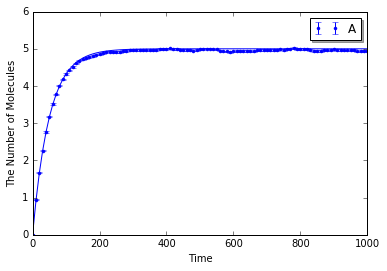

In [2]:
#viz.plot_number_observer(obs1,'r-',obs4,'k.')
#print(obs4.data().T[1][-1])
viz.plot_number_observer(obs2,'r.',obs1,'k-')#,obs3,'k-')

NameError: name 'obs2' is not defined

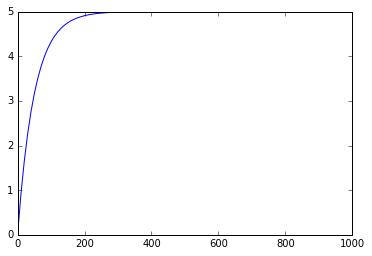

In [4]:
fig=plt.figure()
data1 = np.array(obs1.data()).T
plt.plot(data1[0], data1[1],'-', label='ODE (r={})'.format(rm))
#plt.errorbar(data1[0], data1[1], yerr=err1[1], fmt='r-', label='ODE (r={})'.format(rm))
data2 = np.array(obs2.data()).T
err2 = np.array(obs2.error()).T
#plt.plot(data2[0], data2[1],'.', label='spa (r={})'.format(rm))
plt.errorbar(data2[0], data2[1], yerr=err2[1], fmt='r-', label='spatiocyte (r={})'.format(rm))
data3 = np.array(obs3.data()).T
err3 = np.array(obs3.error()).T
#plt.plot(data3[0], data3[1],'.', label='egfrd (r={})'.format(rm))
plt.legend(loc='best',fontsize=20)
fig.set_size_inches(15, 9)
plt.tick_params(labelsize=20)
s=20
plt.xlabel('time',fontsize=s)
plt.ylabel('number of A molecule',fontsize=s)
#plt.title('L={},D={},kd={:3},keff={:3},ka_Spa={:3},ka_eGFRD={:3}'.format(L,D,0.126,0.02,0.025,0.024),fontsize=s)
#plt.title('Spa:kon=0.0964,koff=0.0177,kd=0.0251,keff=0.0104,kfactor=0.703,eGFRD:kon=0.1,koff=0.0166,keff=0.01',fontsize=s)
#plt.savefig('/home/chew/ecellwork/figure/sturrock_birth_death_rm0.005_Nas10.png')

In [ ]:
rm=0.005
kon=0.0964,koff=0.119,kd=0.0251,keff=0.0207,kfactor=4.73
kon=0.1,koff=0.0979,kd=0.0251,keff=0.02,kfactor=3.9
rm=0.05
kon=0.0601,koff=0.0383,kd=0.251,keff=0.0333,kfactor=0.153
kon=0.1,koff=0.0217,kd=0.251,keff=0.02,kfactor=0.0865

0.05
spa mean 4.864868
egfrd mean 4.72579


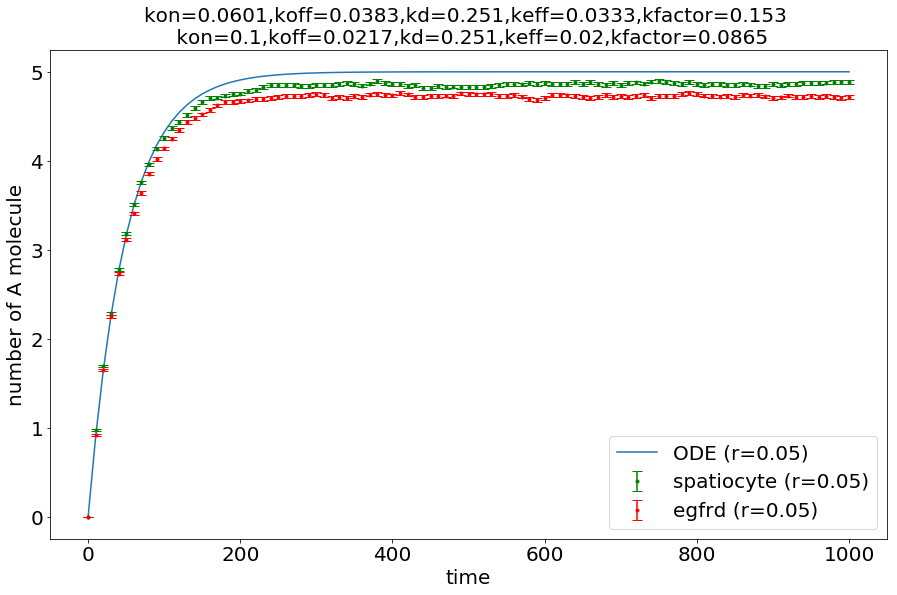

In [90]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
for rm in [0.05]:
    dat1=np.genfromtxt('/home/chew/outputdata/sturrock_bd_ode_rm{}'.format(rm),delimiter=',',dtype='str')
    dat2=np.genfromtxt('/home/chew/outputdata/sturrock_bd_spa_rm{}_Nas5_10k'.format(rm),delimiter=',',dtype='str')
    err2=np.genfromtxt('/home/chew/outputdata/sturrock_bd_spa_rm{}_Nas5_10k_err'.format(rm),delimiter=',',dtype='str')
    dat3=np.genfromtxt('/home/chew/outputdata/sturrock_bd_egfrd_rm{}_Nas5_10k'.format(rm),delimiter=',',dtype='str')
    err3=np.genfromtxt('/home/chew/outputdata/sturrock_bd_egfrd_rm{}_Nas5_10k_err'.format(rm),delimiter=',',dtype='str')
    #dat4=np.genfromtxt('/home/chew/outputdata/sturrock_bd_egfrd_rm{}_largerBsmallerA'.format(rm),delimiter=',',dtype='str')
    fig=plt.figure()
    s1=[float(i) for i in dat2[:,0]]
    s2=[float(i) for i in dat2[:,1]]
    err2=[float(i) for i in err2[:,1]]
    e1=[float(i) for i in dat3[:,0]]
    e2=[float(i) for i in dat3[:,1]]
    err3=[float(i) for i in err3[:,1]]    
    plt.plot(dat1[:,0],dat1[:,1], label='ODE (r={})'.format(rm))
    plt.errorbar(s1, s2, yerr=err2, fmt='g.',capsize=5,label='spatiocyte (r={})'.format(rm))
    plt.errorbar(e1, e2, yerr=err3, fmt='r.',capsize=5,label='egfrd (r={})'.format(rm))
    #plt.plot(dat2[:,0],dat2[:,1],'.', markersize=10, label='spatiocyte (r={})'.format(rm))
    #plt.plot(dat3[:,0],dat3[:,1],'.',markersize=10,  label='egfrd (r={})'.format(rm))
    #plt.plot(dat4[:,0],dat4[:,1],'kx',markersize=10, label='egfrd (r={}) largeBsmallA'.format(rm))
    print(rm)
    print('spa mean',np.mean([float(i) for i in dat2[:,1][-50:]]))
    print('egfrd mean',np.mean([float(i) for i in dat3[:,1][-50:]]))
    plt.tick_params(labelsize=20)
    s=20
    plt.legend(loc='best',fontsize=20)
    plt.xlabel('time',fontsize=s)
    if rm==0.005:
        plt.title('spa:kon=0.0964,koff=0.119,kd=0.0251,keff=0.0207,kfactor=4.73 \n egfrdkon=0.1,koff=0.0979,kd=0.0251,keff=0.02,kfactor=3.9',fontsize=s)
    elif rm==0.05:
        plt.title('kon=0.0601,koff=0.0383,kd=0.251,keff=0.0333,kfactor=0.153 \n kon=0.1,koff=0.0217,kd=0.251,keff=0.02,kfactor=0.0865',fontsize=s)
    plt.ylabel('number of A molecule',fontsize=s)
    fig.set_size_inches(15, 9)
    #plt.savefig('/home/chew/ecellwork/figure/sturrock_birth_death_rm{}_Nas5_10k.png'.format(rm))

In [15]:
from ecell4 import *
from math import pi as pi
for L in [cbrt(100.0)]:
    R=0.05*2
    D=0.01*2
    kd=4*pi*R*D
    V=L**3
    #V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),R*0.5)
    Na=500#./V  #[A]
    Nb=100  #[B]
    k0=0.1  #production rate
    keff = k0*V*V/Na/Nb #degradation rate 
    ka=keff*kd/(kd-keff)
    kon=kd*ka/(kd+ka)
    print(kon==keff)
    Cb=Nb/V
    Ca=Na/V
    t2=(4*pi*Cb*(ka*R/(ka+kd))**3)**0.5
    kss=kon*(1+t2)
    print('kfac',ka/kd)
    print('kss,kon',kss,kon)
    print('[A]',k0/keff/Cb,k0/kss/Cb)

True
kfac 3.896553344263175
kss,kon 0.02159154943091894 0.01999999999999999
[A] 5.000000000000002 4.631441588754196


In [7]:
4.57/4.924

0.9281072298943948

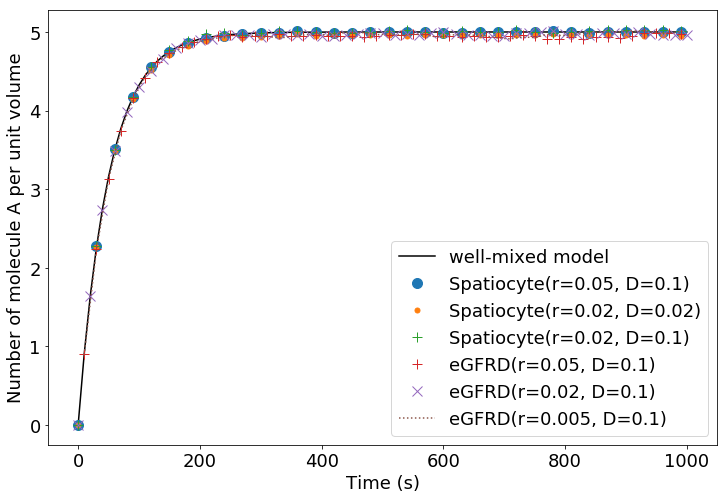

In [174]:
import numpy as np
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import matplotlib.pylab as plt
from ecell4 import *
%matplotlib inline

L=cbrt(100)
data1=[[0.05,0.1,'o'],[0.02,0.02,'.']]#,[0.1,0.01,'1'],,[0.05,0.02,'+'],[0.1,0.1,'x']]
data2=[[0.02,0.1,'+']]#,[0.005,0.1,'x'],
fig,ax=plt.subplots()
ode=np.genfromtxt('/home/chew/outputdata/sturrock_bd_ode_rm{}'.format(0.05),delimiter=',')
plt.plot(ode[:,0],ode[:,1],'k-',label='well-mixed model')
meanspa=[]
for y in data1:
    L=cbrt(100)
    V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),y[0])  
    d=np.genfromtxt('/home/chew/outputdata/sturrock_bd_spa_rm{}_D{}_L4.64'.format(y[0],y[1]),delimiter=',')
    meanspa.append([np.mean(d[:,1][50:])/V,y[0],y[1]])
    plt.plot(d[:,0][::3],d[:,1][::3]/V,y[2],label='Spatiocyte(r={}, D={})'.format(y[0],y[1]),markersize=10)
for y in data2:
    L=5.
    V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),y[0])  
    d=np.genfromtxt('/home/chew/outputdata/sturrock_bd_spa_rm{}_D{}_L5.0'.format(y[0],y[1]),delimiter=',')
    meanspa.append([np.mean(d[:,1][50:])/V,y[0],y[1]])
    plt.plot(d[:,0][::3],d[:,1][::3]/V,y[2],label='Spatiocyte(r={}, D={})'.format(y[0],y[1]),markersize=10)
datae=[[0.05,0.1,'+'],[0.02,0.1,'x'],[0.005,0.1,':']]#,[0.05,0.01,'--'],[0.02,0.02,':'],[0.05,0.02,'-'],[0.005,0.1,':']]

meane=[]
for y in datae:
    L=cbrt(100)
    V=L**3
    d=np.genfromtxt('/home/chew/outputdata/sturrock_bd_egfrd_rm{}_D{}_L4.64'.format(y[0],y[1]),delimiter=',',skip_header=1)
    meane.append([np.mean(d[:,1][50:])/V,y[0],y[1]])    
    plt.plot(d[:,0][::2],d[:,1][::2]/V,y[2],label='eGFRD(r={}, D={})'.format(y[0],y[1]),markersize=10)

s=18
plt.tick_params(labelsize=s)
plt.xlabel('Time (s)',fontsize=s)
plt.ylabel('Number of molecule A per unit volume',fontsize=s)
fig.set_size_inches(12,8)
plt.legend(loc='best',fontsize=s)
#plt.savefig('/home/chew/ecellwork/figure/sturrock_birth_death_timeseries_kss_dpnt_forpaper.png')


In [173]:
meanspa

[[4.9962247018518386, 0.05, 0.1], [5.008424499993037, 0.02, 0.1]]

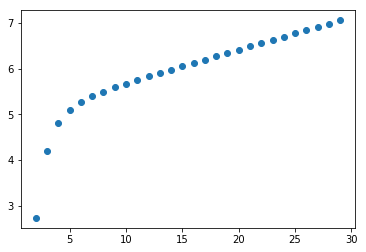

In [10]:
from ecell4 import *
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
Ks=np.arange(2,30,1)
k1=0.02
k2=0.1
L=1.
D=0.1
A=[]
for K in Ks:
    rm=2**(1./6) *L/K/2
    kd=4*3.14*rm*2*D
    #keff=kd*k1/(k1+kd)
    w=spatiocyte.SpatiocyteWorld(Real3(L,L,L),rm)
    V=w.actual_volume()
    #N=w.size()
    N=K**3
    k11=k1*kd/(k1+kd)
    #A.append(k2*(N/V-1)/(k2+k1))
    A.append(k2*(N-1)/(k2+k11*N))
plt.plot(Ks,A,'o')


In [140]:
L=cbrt(100)
f=lambda rm:2.**(-5./6)*L/rm
f(0.02),f(0.05)

(130.25018273967282, 52.10007309586912)